In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def make_timeseries(eyearray, condnum, phase):
    trialorder = phase + ' order'
    eyearray[['start', 'end', trialorder]] = eyearray[['start', 'end', trialorder]].astype(int)
    alltimearray = pd.DataFrame(index=range(5500), columns=range(0,129))
    cortimearray = pd.DataFrame(index=range(5500), columns=range(0,129))
    fix = eyearray[(eyearray['event']=='EFIX') & (eyearray['cond']==condnum)]
    offmask = (fix['startloc'] == 'offscreen')
    fix.loc[offmask, 'startloc'] = np.nan

    for trial, ldf in fix.groupby(by=[trialorder]):
        
        for item, trialinfo in ldf.iterrows():
            start = trialinfo['start']
            end = trialinfo['end']
            loc = trialinfo['startloc']
            accuracy = (trialinfo['recog loc'] == 1)

            alltimearray.iloc[start:end, trial] = loc
            
            if not accuracy:
                continue
            cortimearray.iloc[start:end, trial] = loc

    alltimearray.dropna(axis=1, how='all', inplace = True)  
    cortimearray.dropna(axis=1, how='all', inplace = True)  
    return alltimearray, cortimearray

In [3]:
def get_timeseries_props(timearray, sub):
    numtrials = timearray.shape[1]
    props = pd.DataFrame(index=range(timearray.shape[0]))

    alltot = timearray.count(axis=1)
    props['total_fix'] = alltot

    objlist = ['loc1start', 'loc2start', 'loc3start', 'screen']
    
    for loc in objlist:
        objset = timearray[timearray==loc].count(axis=1)
        props[loc] = objset/alltot
    
    props.reset_index(inplace=True)
    props.rename(columns={'index':'time'}, inplace=True)    
    
    props['sub'] = sub
    
    return props

In [4]:
sublist=['ec105', 'ec106', 'ec107', 'ec108', 'ec109']
phase='refresh'
allprops = pd.DataFrame()
corprops = pd.DataFrame()
for sub in sublist:
    file='data/' + sub + phase + 'eyebehave.csv'
    print(file)
    eye=pd.read_csv(file, index_col=0)
    
    alltimearray, cortimearray = make_timeseries(eye, 1, phase)
    
    corprops_sub = get_timeseries_props(cortimearray, sub)
    allprops_sub = get_timeseries_props(alltimearray, sub)
    
    allprops = pd.concat([allprops, allprops_sub])
    corprops = pd.concat([corprops, corprops_sub])


data/ec105refresheyebehave.csv


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


data/ec106refresheyebehave.csv
data/ec107refresheyebehave.csv
data/ec108refresheyebehave.csv
data/ec109refresheyebehave.csv


In [17]:
loclist = ['loc1start', 'loc2start', 'loc3start']

In [18]:
def downsample_timeseries(timearray, newsamplerate):
    alltimes = timearray.time.unique()
    times_to_keep = alltimes[0:len(alltimes):newsamplerate]
    downsampled = timearray.set_index('time')
    downsampled = downsampled.loc[times_to_keep,:]
    return downsampled

corprops100 = downsample_timeseries(corprops, 100)
allprops100 = downsample_timeseries(allprops, 100)


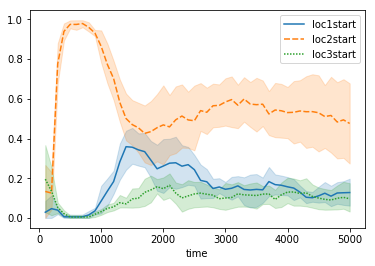

In [19]:
data = corprops100[loclist]
sns.lineplot(data=data)

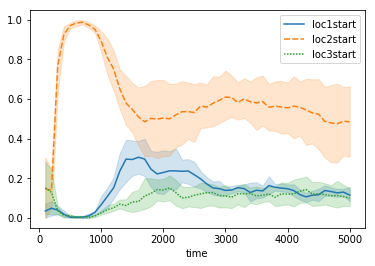

In [20]:
data = allprops100[loclist]
sns.lineplot(data=data)